In [2]:
pip install requests pandas

In [3]:
# ============================================================
# 🟦 ETAPA 1 — IMPORTAÇÃO E CARREGAMENTO DOS DADOS
# ============================================================

import pandas as pd
import numpy as np
import requests

# URL do JSON cru no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

# Converter a lista de dicionários em DataFrame
df = pd.json_normalize(data)

print("Dados carregados com sucesso!")
df.head()


Dados carregados com sucesso!


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# ============================================================
# 🟦 ETAPA 2 — EXPLORAÇÃO INICIAL DO DATASET
# ============================================================

print("=== Informações gerais ===")
df.info()

print("\n=== Estatísticas descritivas ===")
df.describe(include='all').T

print("\n=== Distribuição da variável alvo (Churn) ===")
display(df["Churn"].value_counts())

print("\n=== Proporção da variável alvo ===")
display(df["Churn"].value_counts(normalize=True))


=== Informações gerais ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport 

,count
Churn,
No,5174
Yes,1869
,224



=== Proporção da variável alvo ===


,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


In [5]:
# ============================================================
# 🟦 ETAPA 3 — VERIFICAÇÃO DE PROBLEMAS NOS DATOS
# ============================================================

print("=== Valores ausentes por coluna ===")
display(df.isnull().sum())

print("\n=== Percentual de valores ausentes ===")
display((df.isnull().mean() * 100).round(2))

print("\n=== Linhas duplicadas ===")
print(df.duplicated().sum())

print("\n=== Tipos de dados ===")
display(df.dtypes)

# Verificação de valores únicos (amostra)
print("\n=== Valores únicos por coluna (amostra) ===")
for col in df.columns:
    print(f"\n📌 Coluna: {col}")
    print(df[col].unique()[:10])


=== Valores ausentes por coluna ===


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



=== Percentual de valores ausentes ===


,0
customerID,0.0
Churn,0.0
customer.gender,0.0
customer.SeniorCitizen,0.0
customer.Partner,0.0
customer.Dependents,0.0
customer.tenure,0.0
phone.PhoneService,0.0
phone.MultipleLines,0.0
internet.InternetService,0.0



=== Linhas duplicadas ===
0

=== Tipos de dados ===


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object



=== Valores únicos por coluna (amostra) ===

📌 Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']

📌 Coluna: Churn
['No' 'Yes' '']

📌 Coluna: customer.gender
['Female' 'Male']

📌 Coluna: customer.SeniorCitizen
[0 1]

📌 Coluna: customer.Partner
['Yes' 'No']

📌 Coluna: customer.Dependents
['Yes' 'No']

📌 Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72]

📌 Coluna: phone.PhoneService
['Yes' 'No']

📌 Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']

📌 Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']

📌 Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

📌 Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

📌 Coluna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

📌 Coluna: internet.TechSupport
['Yes' 'No' 'No internet service']

📌 Coluna: internet.StreamingTV
['Yes' 'No' 'No internet service']

📌 Coluna: internet.Strea

In [6]:
# ============================================================
# 🟦 ETAPA 4 — LIMPEZA DOS DATOS
# ============================================================

# -----------------------------
# 1. Remover duplicados
# -----------------------------
df = df.drop_duplicates()
print("Duplicados removidos!")

# -----------------------------
# 2. Conversão de colunas numéricas
# Total pode vir como string, então convertemos:
# -----------------------------
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")
df["account.Charges.Monthly"] = pd.to_numeric(df["account.Charges.Monthly"], errors="coerce")

print("Conversões numéricas concluídas!")

# -----------------------------
# 3. Padronização da coluna Churn
# -----------------------------
df["Churn"] = df["Churn"].str.strip().str.title()  # Ex: "yes" → "Yes"

# -----------------------------
# 4. Padronização de categorias textuais
# -----------------------------
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

print("Padronização de texto concluída!")

# -----------------------------
# 5. Tratamento de valores ausentes
# (a estratégia simples pode ser refinada depois)
# -----------------------------

# Preencher dados numéricos com mediana
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Preencher categorias ausentes com "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

print("Tratamento de missing concluído!")

# -----------------------------
# 6. Conferência final
# -----------------------------
print("\n=== Verificação final de missing ===")
display(df.isnull().sum())

print("\n=== Tipos finais ===")
display(df.dtypes)

print("\nLimpeza concluída com sucesso! 🚀")

Duplicados removidos!
Conversões numéricas concluídas!
Padronização de texto concluída!
Tratamento de missing concluído!

=== Verificação final de missing ===


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



=== Tipos finais ===


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object



Limpeza concluída com sucesso! 🚀


In [7]:
# ============================================================
# 🟦 ETAPA 4B — AJUSTES FINOS E CORREÇÃO DE INCONSISTÊNCIAS
# ============================================================

# -----------------------------
# 1. Padronização avançada de texto
# -----------------------------
cols_obj = df.select_dtypes(include="object").columns

for col in cols_obj:
    df[col] = (
        df[col]
        .str.strip()
        .str.replace("  ", " ", regex=False)  # remove espaços duplos
        .str.replace("_", " ", regex=False)   # padroniza underscores
        .str.title()                          # deixa tudo Title Case
    )

print("Padronização avançada aplicada!")


# -----------------------------
# 2. Correções específicas de categorias conhecidas
# -----------------------------

# InternetService pode vir com variações como:
# "Fiber optic", "Fiber Optic", "fiber", "Fiber-Optic"
df["internet.InternetService"] = df["internet.InternetService"].str.replace("-", " ", regex=False)

df["internet.InternetService"] = df["internet.InternetService"].replace({
    "Fiber": "Fiber Optic",
    "Fiber Optic": "Fiber Optic",
    "Dsl": "DSL",
})

# Contract
df["account.Contract"] = df["account.Contract"].replace({
    "Month To Month": "Month-to-month",
    "One Year": "One Year",
    "Two Year": "Two Year"
})

# MultipleLines (corrigir coisas como "No phone service")
df["phone.MultipleLines"] = df["phone.MultipleLines"].replace({
    "No Phone Service": "No"
})

print("Correções específicas aplicadas!")


# -----------------------------
# 3. Verificação de colunas com valores anormais
# -----------------------------

# Total não pode ser negativo ou texto estranho
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Se Total estiver zero mas tenure > 0 → provável erro → substitui por mediana
mask_total_zerado = (df["account.Charges.Total"] == 0) & (df["customer.tenure"] > 0)
df.loc[mask_total_zerado, "account.Charges.Total"] = df["account.Charges.Total"].median()

print("Valores numéricos inconsistentes corrigidos!")


# -----------------------------
# 4. Criar coluna de faixa de Comissão/Charges
# -----------------------------
df["MonthlyRange"] = pd.cut(
    df["account.Charges.Monthly"],
    bins=[0, 40, 70, 150],
    labels=["Baixo", "Médio", "Alto"]
)

df["TotalRange"] = pd.cut(
    df["account.Charges.Total"],
    bins=[0, 1500, 3500, df["account.Charges.Total"].max()],
    labels=["Baixo", "Médio", "Alto"]
)

print("Criação de faixas numéricas concluída!")


# -----------------------------
# 5. Conferência final
# -----------------------------
print("\n=== Conferência Final de Categorias ===")
for col in ["internet.InternetService", "account.Contract", "phone.MultipleLines"]:
    print(f"\nColuna: {col}")
    print(df[col].value_counts())

print("\nAjustes finais concluídos com sucesso! 🚀")

Padronização avançada aplicada!
Correções específicas aplicadas!
Valores numéricos inconsistentes corrigidos!
Criação de faixas numéricas concluída!

=== Conferência Final de Categorias ===

Coluna: internet.InternetService
internet.InternetService
Fiber Optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: account.Contract
account.Contract
Month-To-Month    4005
Two Year          1743
One Year          1519
Name: count, dtype: int64

Coluna: phone.MultipleLines
phone.MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64

Ajustes finais concluídos com sucesso! 🚀


In [17]:
# 🟦 ETAPA 4C — FEATURE ENGINEERING (Contas_Diarias)
# ============================================================

print("Verificando as colunas disponíveis:")
print(df.columns)

# Possíveis nomes para a coluna de custo mensal
possibilidades = ["Custo_Mensal", "Custo Mensal", "MonthlyCharges", "Mensalidade"]

# Identificar automaticamente a coluna correta
coluna_custo = None
for col in df.columns:
    if col in possibilidades:
        coluna_custo = col
        break

if coluna_custo is None:
    print("❌ Nenhuma coluna relacionada a custo mensal foi encontrada no dataset.")
else:
    print(f"✔ Coluna identificada: {coluna_custo}")

    # Criar a coluna Contas_Diarias
    df["Contas_Diarias"] = df[coluna_custo] / 30

    print("✔ Coluna 'Contas_Diarias' criada com sucesso!")

    # Conferência rápida
    display(df[[coluna_custo, "Contas_Diarias"]].head())


Verificando as colunas disponíveis:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'MonthlyRange',
       'TotalRange'],
      dtype='object')
❌ Nenhuma coluna relacionada a custo mensal foi encontrada no dataset.


In [11]:
# ============================================================
# 5. CARGA DOS DADOS PREPARADOS (LOAD)
# ============================================================

# Neste ponto, df é a versão final do dataset já tratada.
# Se quiser salvar para reuso, descomente a linha abaixo:

df.to_csv("dados_limpos.csv", index=False)

print("Dataset preparado com sucesso! Total de linhas:", len(df))
df.head()

Dataset preparado com sucesso! Total de linhas: 7267


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,MonthlyRange,TotalRange
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30,Médio,Baixo
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40,Médio,Baixo
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85,Alto,Baixo
3,0011-Igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85,Alto,Baixo
4,0013-Exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40,Alto,Baixo


Estatísticas descritivas:


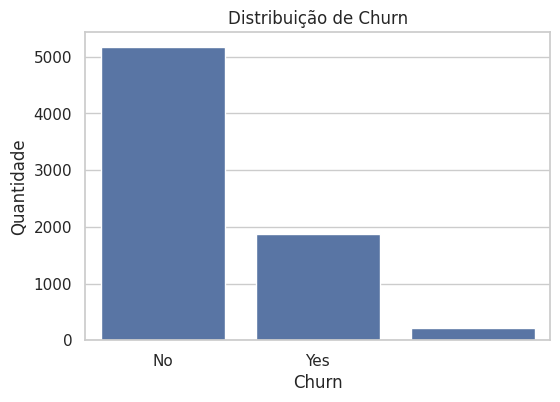


Proporção de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


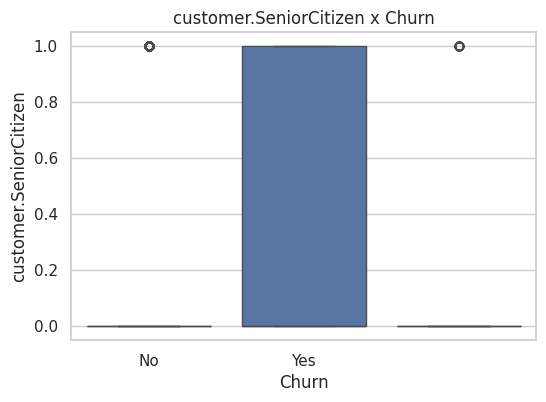

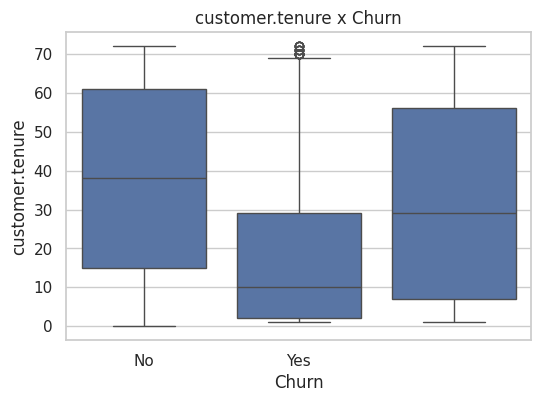

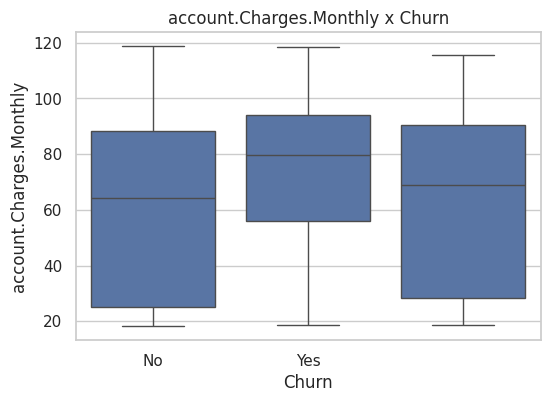

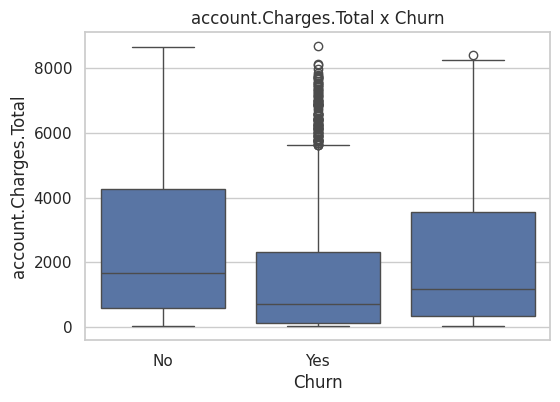

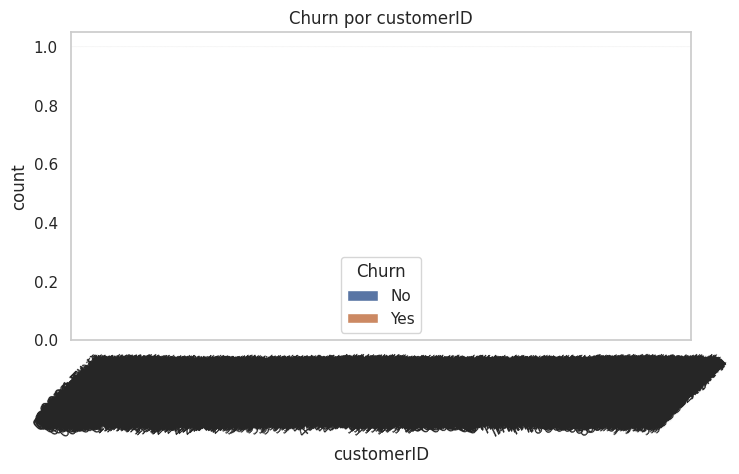

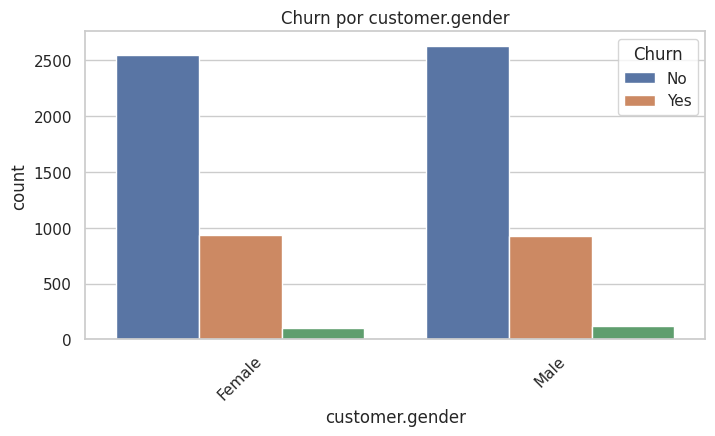

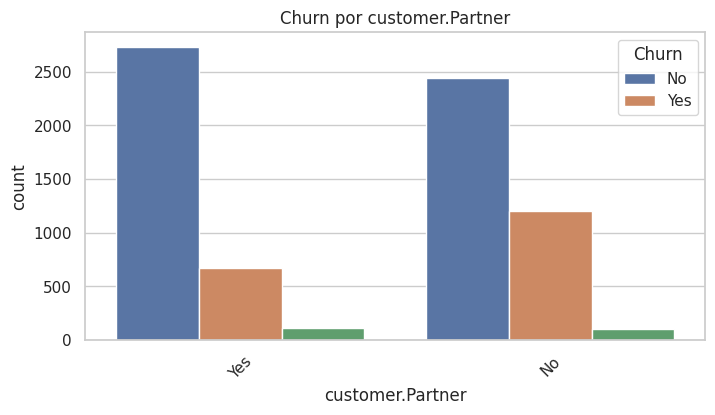

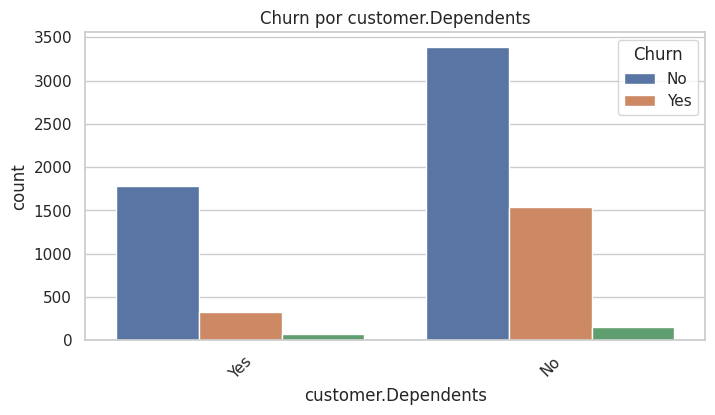

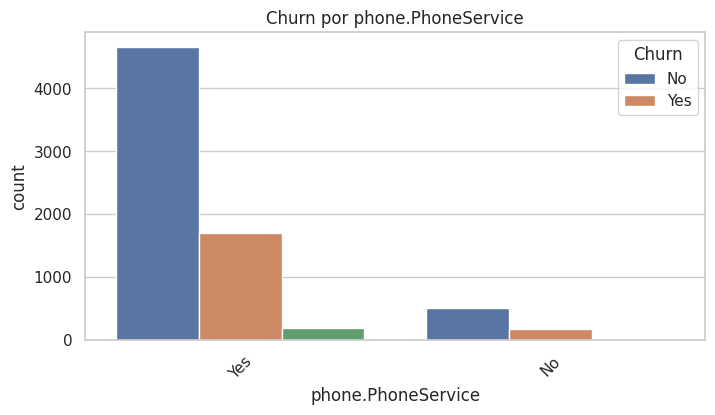

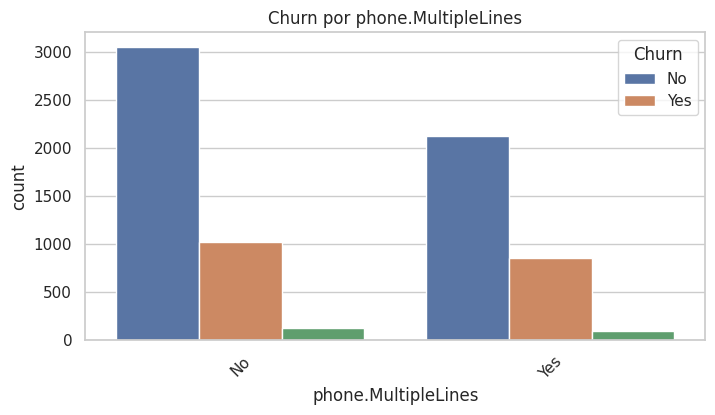

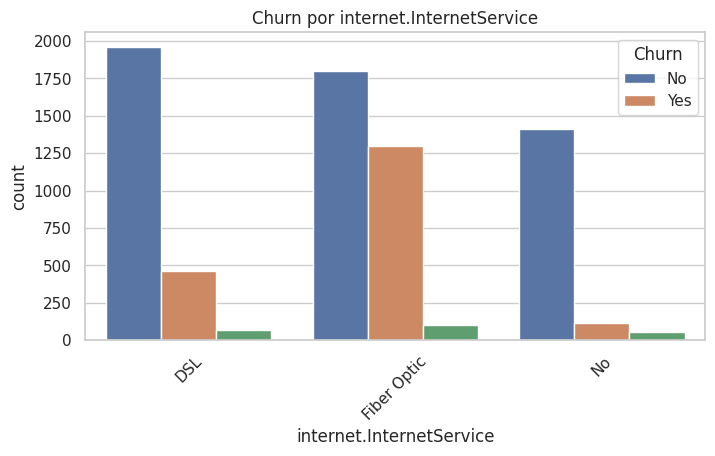

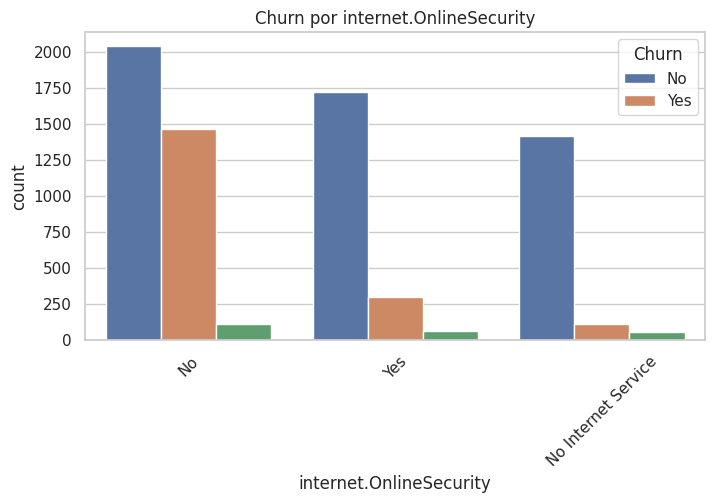

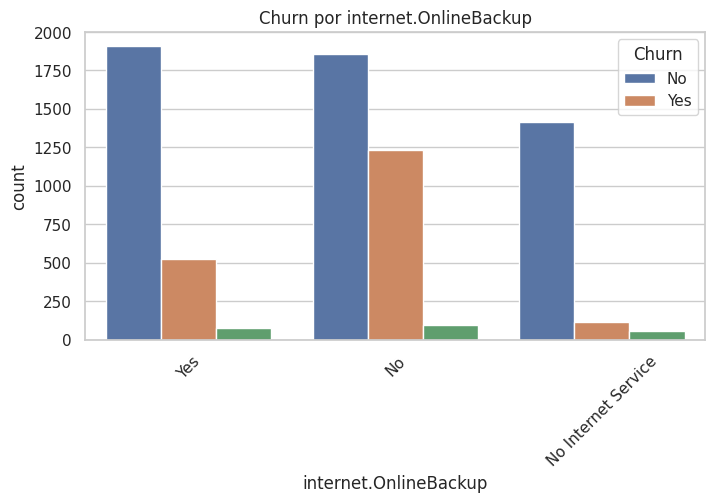

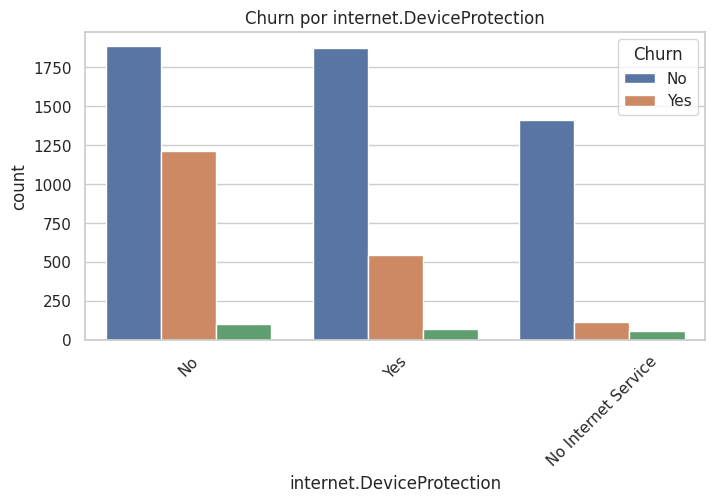

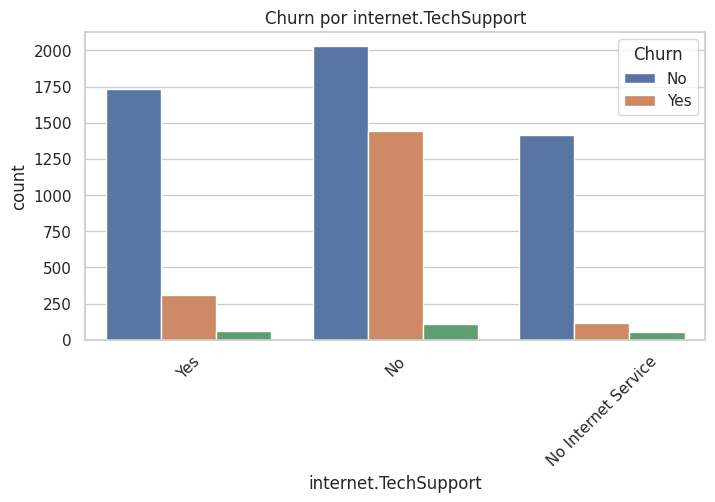

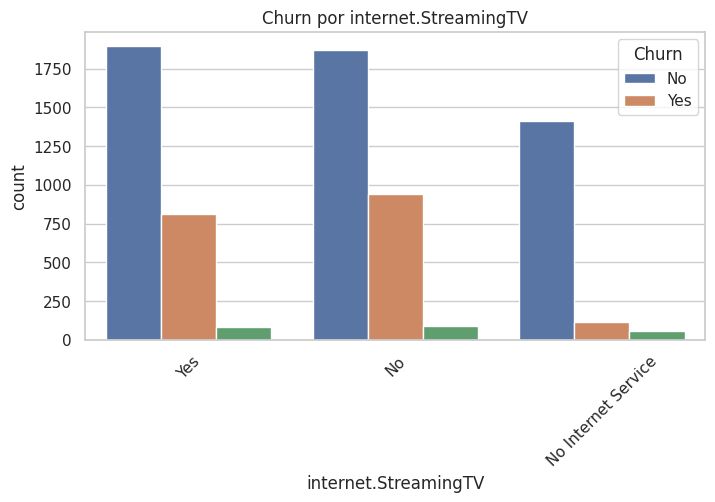

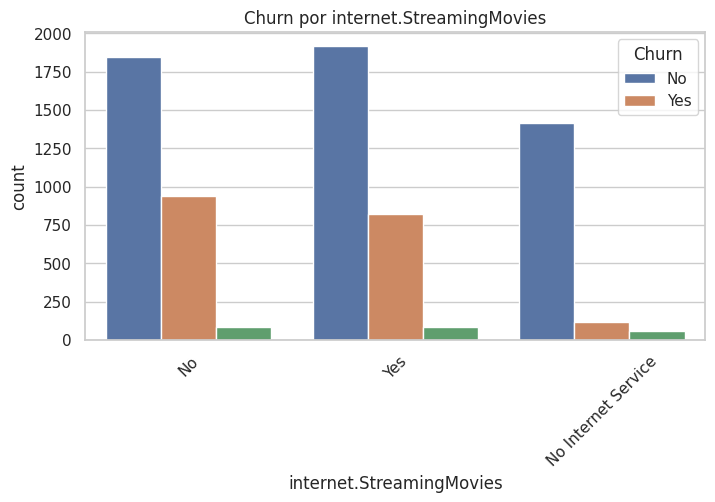

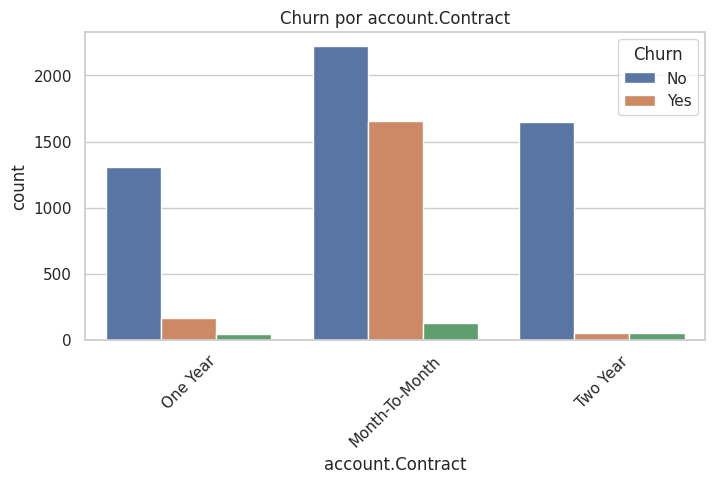

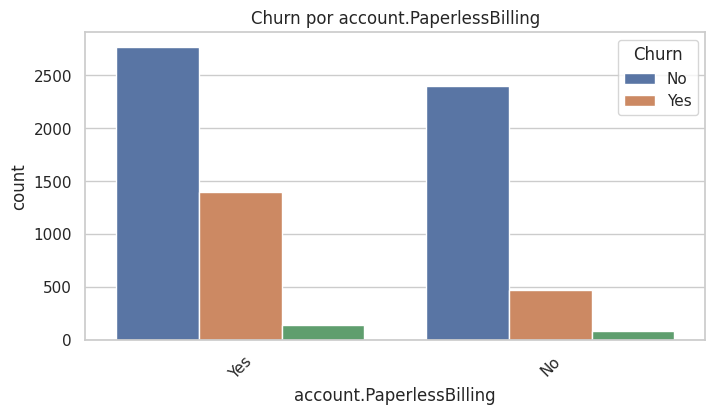

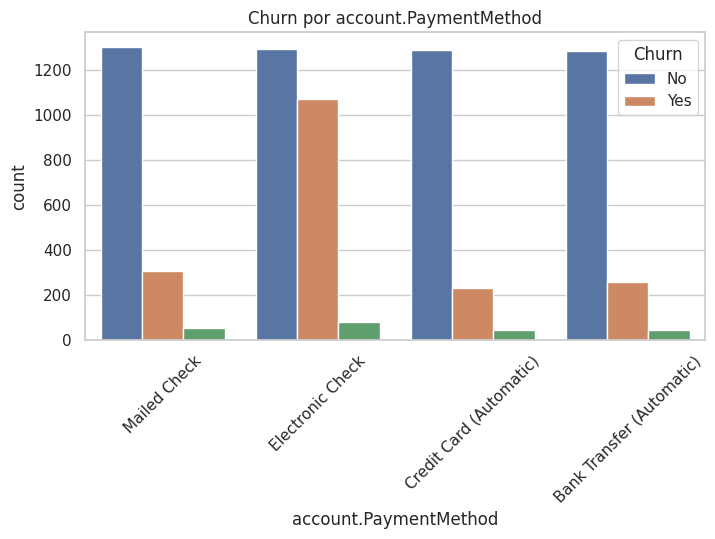

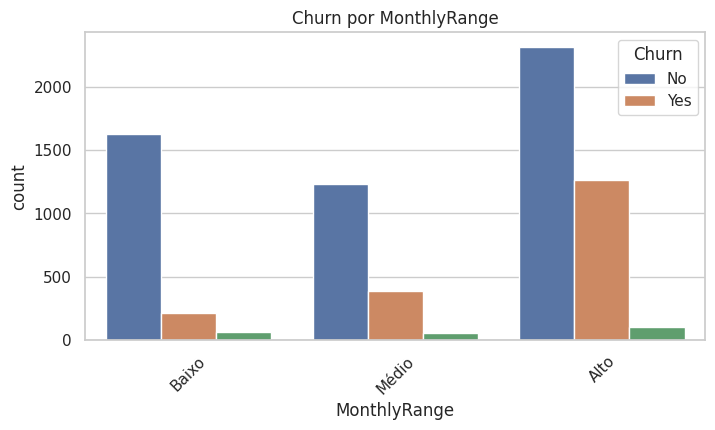

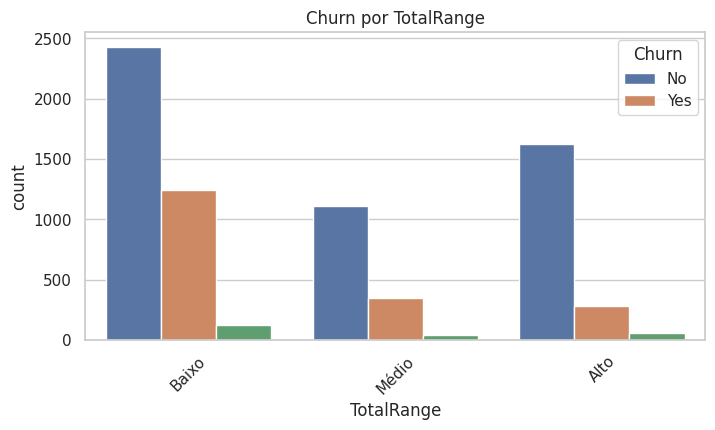

In [12]:
# ============================================================
# 6. ANÁLISE EXPLORATÓRIA INICIAL (EDA)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Para gráficos mais limpos
sns.set(style="whitegrid")

# -------------------------------
# 6.1 — Estatísticas gerais
# -------------------------------
print("Estatísticas descritivas:")
df.describe(include="all")


# -------------------------------
# 6.2 — Distribuição de Churn
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribuição de Churn")
plt.xlabel("Churn")
plt.ylabel("Quantidade")
plt.show()

print("\nProporção de Churn:")
print(df["Churn"].value_counts(normalize=True) * 100)


# -------------------------------
# 6.3 — Relação entre churn e variáveis numéricas
# -------------------------------
variaveis_numericas = df.select_dtypes(include=["float64", "int64"]).columns

for coluna in variaveis_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Churn", y=coluna)
    plt.title(f"{coluna} x Churn")
    plt.show()


# -------------------------------
# 6.4 — Relação entre churn e variáveis categóricas
# -------------------------------
variaveis_categoricas = df.select_dtypes(include=["object", "category"]).columns

for coluna in variaveis_categoricas:
    if coluna == "Churn":
        continue
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=coluna, hue="Churn")
    plt.title(f"Churn por {coluna}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# ============================================================
# 6B — ANÁLISE DESCRITIVA DETALHADA
# ============================================================

print("📌 Estatísticas descritivas gerais:")
display(df.describe())  # estatísticas para colunas numéricas

print("\n📌 Estatísticas descritivas completas (inclui categóricas):")
display(df.describe(include='all').T)

# -------------------------------------------------------------
# Distribuição das variáveis numéricas individualmente
# -------------------------------------------------------------
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns

print("\n📌 Distribuição das variáveis numéricas:")
for coluna in variaveis_numericas:
    print(f"\n--- {coluna} ---")
    print(f"Média: {df[coluna].mean():.2f}")
    print(f"Mediana: {df[coluna].median():.2f}")
    print(f"Desvio Padrão: {df[coluna].std():.2f}")
    print(f"Mínimo: {df[coluna].min()}")
    print(f"Máximo: {df[coluna].max()}")
    print(f"Valores ónicos: {df[coluna].nunique()}")

📌 Estatísticas descritivas gerais:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2279.287581
std,0.369074,24.571773,30.129572,2267.178963
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,401.400000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000



📌 Estatísticas descritivas completas (inclui categóricas):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-Hotoh,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7267,3,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone.MultipleLines,7267,2,No,4202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,Fiber Optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📌 Distribuição das variáveis numéricas:

--- customer.SeniorCitizen ---
Média: 0.16
Mediana: 0.00
Desvio Padrão: 0.37
Mínimo: 0
Máximo: 1
Valores ónicos: 2

--- customer.tenure ---
Média: 32.35
Mediana: 29.00
Desvio Padrão: 24.57
Mínimo: 0
Máximo: 72
Valores ónicos: 73

--- account.Charges.Monthly ---
Média: 64.72
Mediana: 70.30
Desvio Padrão: 30.13
Mínimo: 18.25
Máximo: 118.75
Valores ónicos: 1585

--- account.Charges.Total ---
Média: 2279.29
Mediana: 1391.00
Desvio Padrão: 2267.18
Mínimo: 18.8
Máximo: 8684.8
Valores ónicos: 6531


📌 Contagem de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


/tmp/ipython-input-3255604828.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


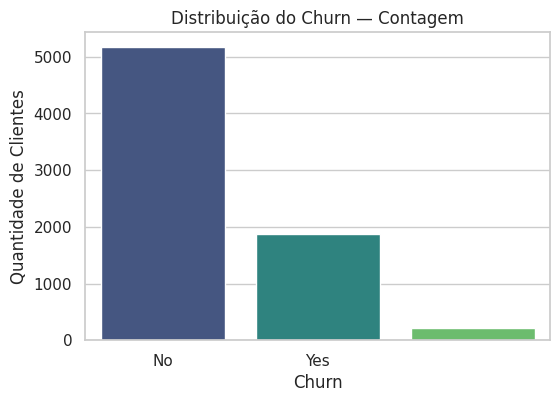

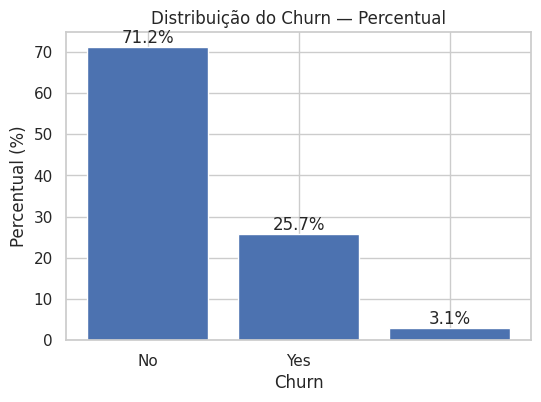

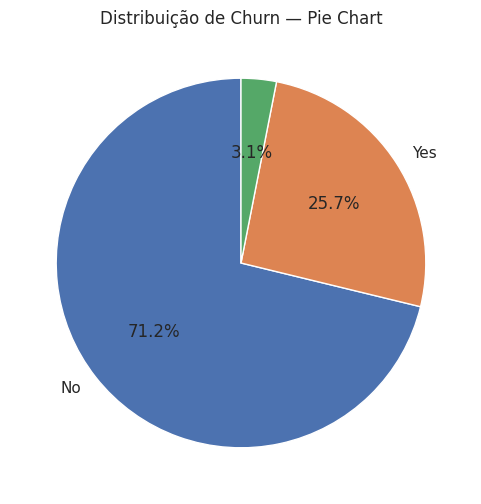

In [14]:
# ============================================================
# 6C — DISTRIBUIÇÃO DO CHURN
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Contagem simples
# ------------------------------------------------------------
churn_counts = df['Churn'].value_counts()

print("📌 Contagem de Churn:")
print(churn_counts)

# ------------------------------------------------------------
# Gráfico de barras (contagem)
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title("Distribuição do Churn — Contagem")
plt.xlabel("Churn")
plt.ylabel("Quantidade de Clientes")
plt.show()

# ------------------------------------------------------------
# Gráfico de proporção (%)
# ------------------------------------------------------------
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
plt.bar(churn_percent.index, churn_percent.values)
plt.title("Distribuição do Churn — Percentual")
plt.xlabel("Churn")
plt.ylabel("Percentual (%)")

# Adicionar labels acima das barras
for i, val in enumerate(churn_percent.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')

plt.show()

# ------------------------------------------------------------
# Gráfico de pizza (opcional)
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição de Churn — Pie Chart")
plt.show()


📌 Analisando: customerID


/tmp/ipython-input-81620119.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


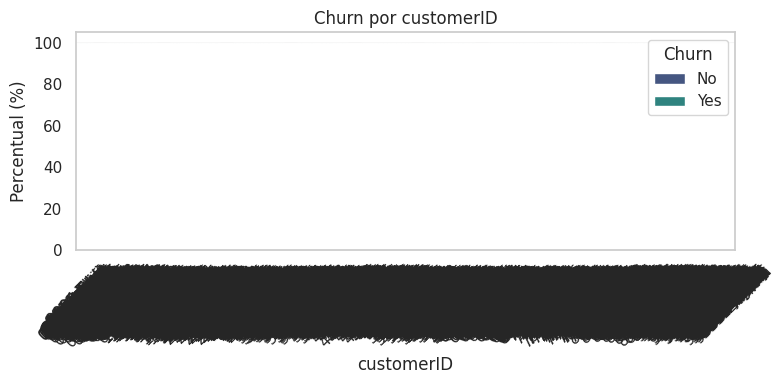


📌 Analisando: Churn


/tmp/ipython-input-81620119.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn")


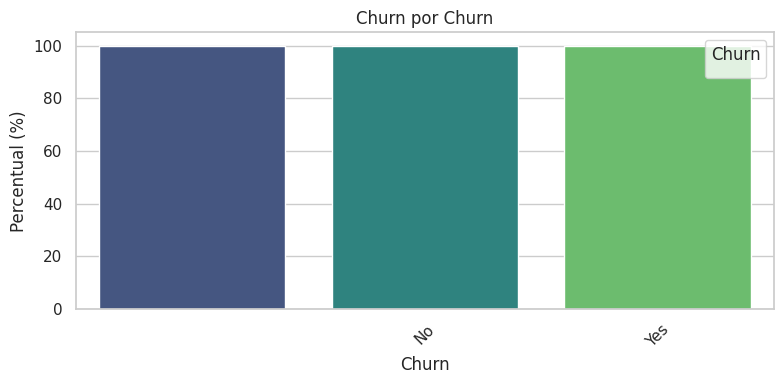


📌 Analisando: customer.gender


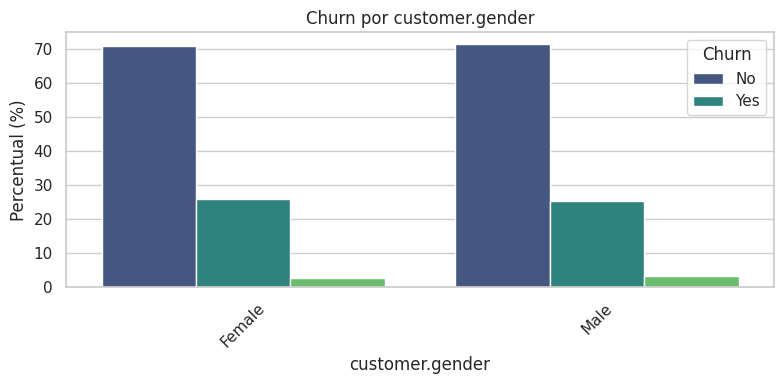


📌 Analisando: customer.Partner


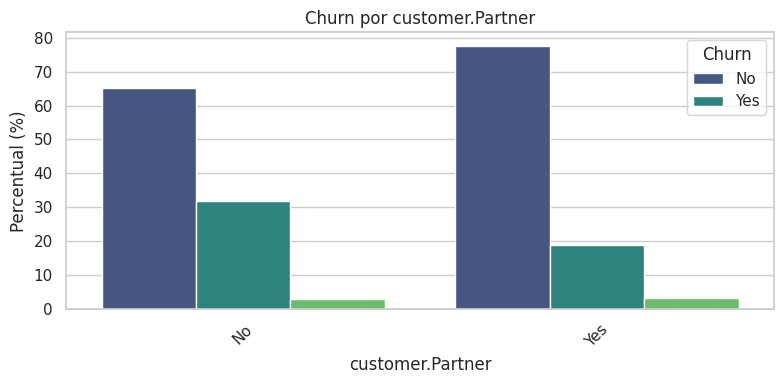


📌 Analisando: customer.Dependents


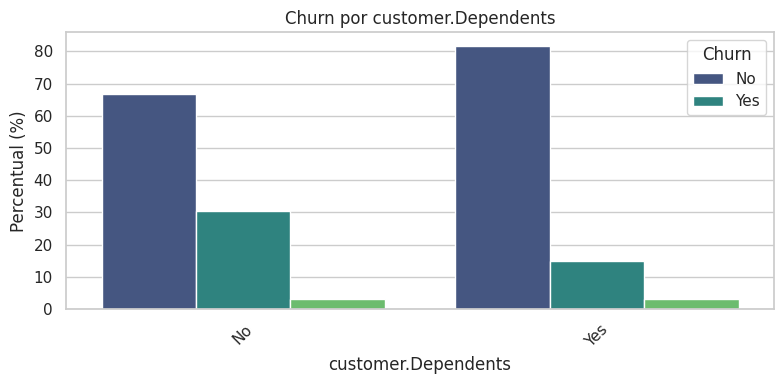


📌 Analisando: phone.PhoneService


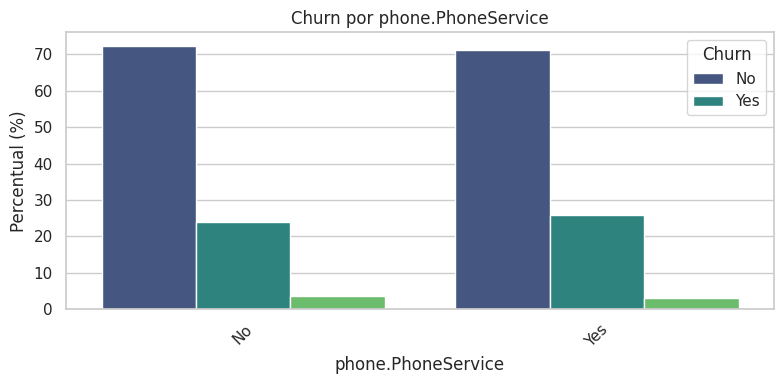


📌 Analisando: phone.MultipleLines


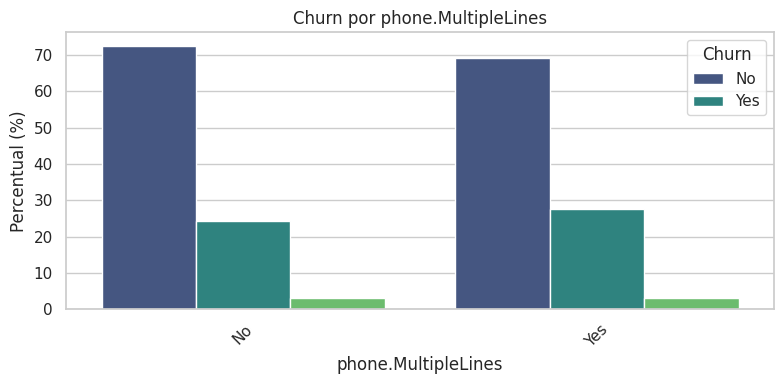


📌 Analisando: internet.InternetService


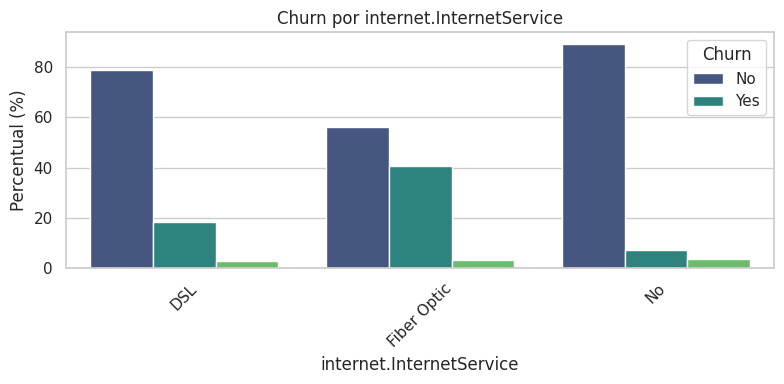


📌 Analisando: internet.OnlineSecurity


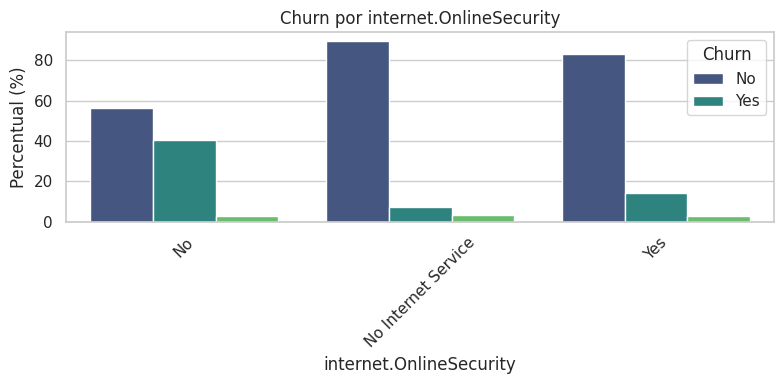


📌 Analisando: internet.OnlineBackup


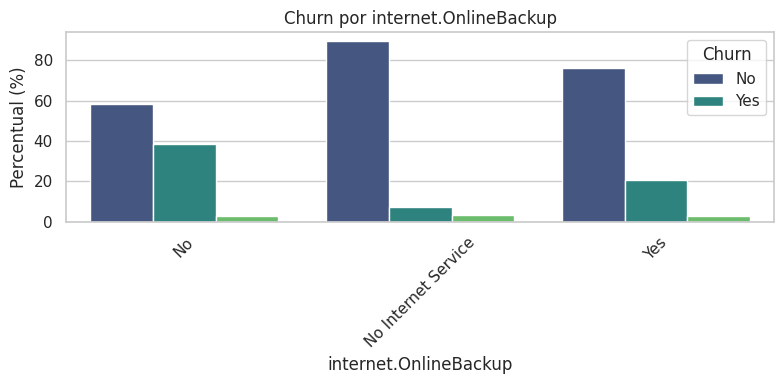


📌 Analisando: internet.DeviceProtection


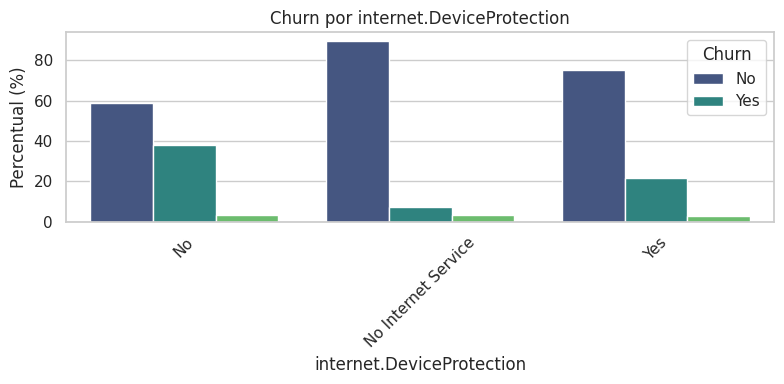


📌 Analisando: internet.TechSupport


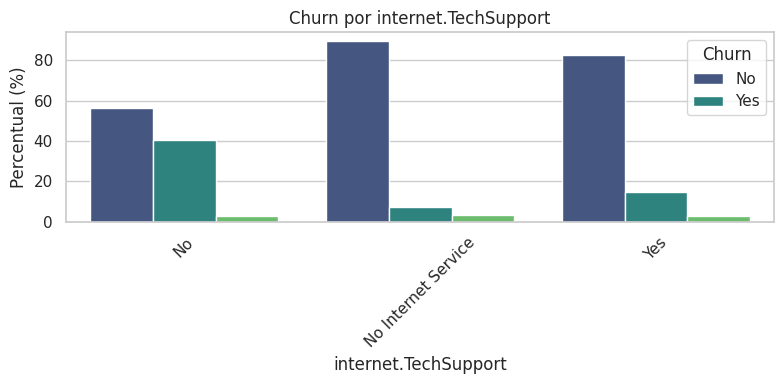


📌 Analisando: internet.StreamingTV


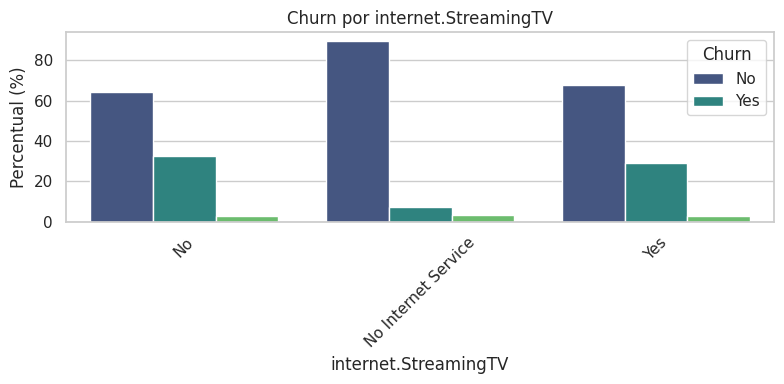


📌 Analisando: internet.StreamingMovies


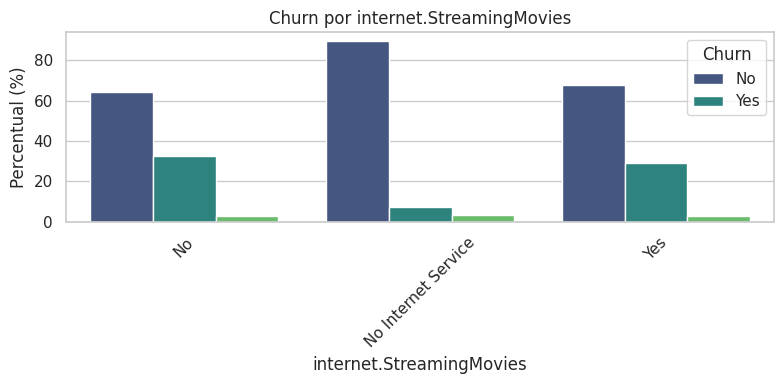


📌 Analisando: account.Contract


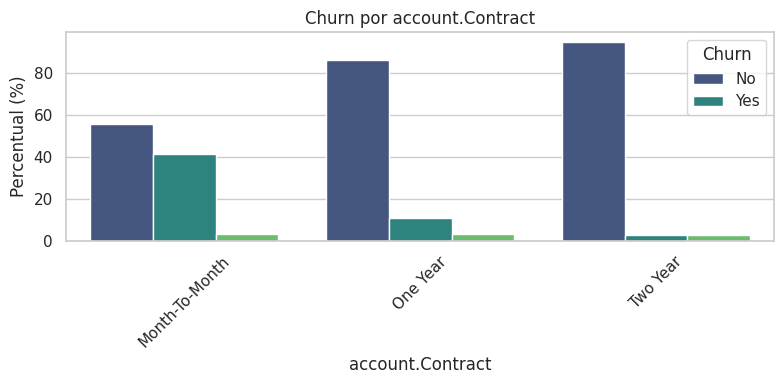


📌 Analisando: account.PaperlessBilling


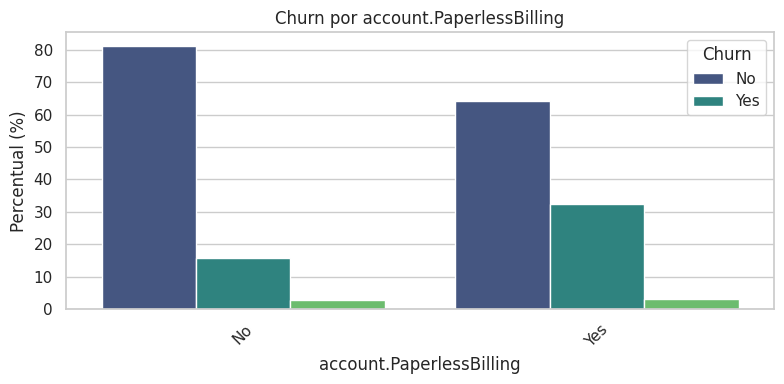


📌 Analisando: account.PaymentMethod


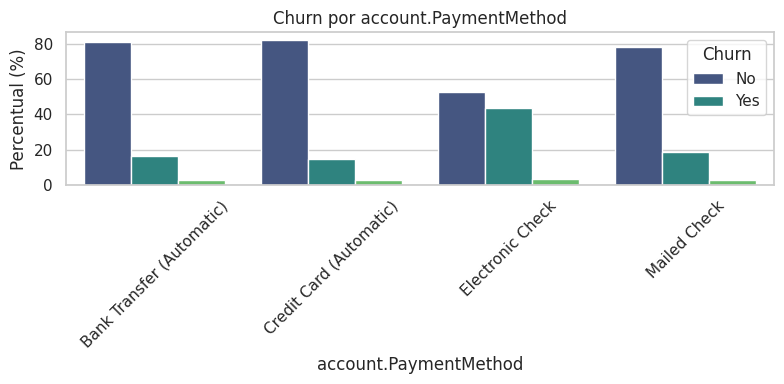

In [15]:
# ============================================================
# 6D — CHURN POR VARIÁVEIS CATEGÓRICAS
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Lista automática de variáveis categóricas
categoricas = df.select_dtypes(include=['object']).columns
categoricas = [col for col in categoricas if col not in ['ID_Cliente']]  # remove ID

# ------------------------------------------------------------
# Função para gerar gráficos de churn por categoria
# ------------------------------------------------------------
def plot_churn_por_categoria(df, coluna):
    plt.figure(figsize=(8,4))
    prop = (df.groupby(coluna)['Churn']
            .value_counts(normalize=True)
            .mul(100)
            .rename('percentual')
            .reset_index())

    sns.barplot(
        data=prop,
        x=coluna,
        y="percentual",
        hue="Churn",
        palette="viridis"
    )

    plt.title(f"Churn por {coluna}")
    plt.ylabel("Percentual (%)")
    plt.xlabel(coluna)
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# Gerar gráficos para todas as variáveis categóricas
# ------------------------------------------------------------
for coluna in categoricas:
    print(f"\n📌 Analisando: {coluna}")
    plot_churn_por_categoria(df, coluna)

In [19]:
print("=== Verificação Final da Padronização de Dados ===")

print("\n📌 Coluna 'Churn' (Contagem e Tipo):")
if "Churn" in df.columns:
    display(df["Churn"].value_counts())
    display(df["Churn"].dtype)
else:
    print("❌ Coluna 'Churn' não encontrada.")

# Lista realista das possíveis colunas binárias
binarias_possiveis = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling",
    "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

print("\n📌 Colunas Binárias (Valores Únicos e Tipo):")
for col in binarias_possiveis:
    if col in df.columns:
        print(f"\n  - {col}:")
        display(df[col].value_counts())
        display(df[col].dtype)
    else:
        print(f"  - {col}: (coluna não existe no dataset)")

# Colunas categóricas comuns no dataset Telco
categoricas_possiveis = [
    "gender", "InternetService", "Contract", "PaymentMethod"
]

print("\n📌 Colunas Categóricas Convertidas (Valores Únicos e Tipo):")
for col in categoricas_possiveis:
    if col in df.columns:
        print(f"\n  - {col}:")
        display(df[col].value_counts())
        display(df[col].dtype)
    else:
        print(f"  - {col}: (coluna não existe no dataset)")

# Verificação de NaNs
print("\n📌 Verificação de NaNs em colunas numéricas/convertidas:")
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
nans_found = df[numeric_cols].isnull().sum()
nans_found = nans_found[nans_found > 0]

if not nans_found.empty:
    print("NaNs encontrados nas seguintes colunas:")
    display(nans_found)
else:
    print("Nenhum NaN inesperado encontrado nas colunas numéricas/convertidas.")

print("\n✔ Verificação final concluída.")


=== Verificação Final da Padronização de Dados ===

📌 Coluna 'Churn' (Contagem e Tipo):


,count
Churn,
No,5174
Yes,1869
,224


dtype('O')


📌 Colunas Binárias (Valores Únicos e Tipo):
  - Partner: (coluna não existe no dataset)
  - Dependents: (coluna não existe no dataset)
  - PhoneService: (coluna não existe no dataset)
  - PaperlessBilling: (coluna não existe no dataset)
  - MultipleLines: (coluna não existe no dataset)
  - OnlineSecurity: (coluna não existe no dataset)
  - OnlineBackup: (coluna não existe no dataset)
  - DeviceProtection: (coluna não existe no dataset)
  - TechSupport: (coluna não existe no dataset)
  - StreamingTV: (coluna não existe no dataset)
  - StreamingMovies: (coluna não existe no dataset)

📌 Colunas Categóricas Convertidas (Valores Únicos e Tipo):
  - gender: (coluna não existe no dataset)
  - InternetService: (coluna não existe no dataset)
  - Contract: (coluna não existe no dataset)
  - PaymentMethod: (coluna não existe no dataset)

📌 Verificação de NaNs em colunas numéricas/convertidas:
Nenhum NaN inesperado encontrado nas colunas numéricas/convertidas.

✔ Verificação final concluída.


In [21]:
# ============================================================
# 🟦 ETAPA 7 — PADRONIZAÇÃO E TRANSFORMAÇÃO DE DADOS
# ============================================================

# --------------------------------
# 1. Renomear colunas para facilitar análise (FAZER ISSO PRIMEIRO)
# --------------------------------

df = df.rename(columns={
    "customerID": "ID_Cliente",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Idoso",
    "customer.Partner": "Tem_Parceiro",
    "customer.Dependents": "Tem_Dependentes",
    "customer.tenure": "Meses_Relacao",
    "phone.PhoneService": "Telefone_Ativo",
    "phone.MultipleLines": "Multiplas_Linhas",
    "internet.InternetService": "Internet_Tipo",
    "internet.OnlineSecurity": "Seguranca_Online",
    "internet.OnlineBackup": "Backup_Online",
    "internet.DeviceProtection": "Protecao_Dispositivo",
    "internet.TechSupport": "Suporte_Tecnico",
    "internet.StreamingTV": "Streaming_TV",
    "internet.StreamingMovies": "Streaming_Filmes",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Fatura_Digital",
    "account.PaymentMethod": "Metodo_Pagamento",
    "account.Charges.Monthly": "Custo_Mensal",
    "account.Charges.Total": "Custo_Total",
    "Contas_Diarias": "Custo_Diario"
})

print("Renomeação de colunas concluída!")

# --------------------------------
# 2. Converter colunas binárias Yes/No em 1/0
# --------------------------------

binarias = [
    "Churn", "Tem_Parceiro", "Tem_Dependentes", "Telefone_Ativo", "Multiplas_Linhas",
    "Backup_Online", "Seguranca_Online", "Protecao_Dispositivo",
    "Suporte_Tecnico", "Streaming_TV", "Streaming_Filmes", "Fatura_Digital"
]

for col in binarias:
    # Debug print
    print(f"\nDEBUG: Processando coluna binária '{col}'")
    print(f"DEBUG: Valores originais (após renomeação): {df[col].unique()}")

    # 1. Garante que a coluna é string para todas as operações seguintes
    s = df[col].astype(str).str.lower().str.strip()
    print(f"DEBUG: Valores após to_str/lower/strip: {s.unique()}")

    # 2. Padroniza e trata valores não-padrão para 'yes' ou 'no'
    s = s.replace({
        "": "no", # string vazia vira 'no'
        "nan": "no", # string 'nan' vira 'no'
        "no internet service": "no", # padroniza internet
        "no phone service": "no", # padroniza telefone
        "0": "no", # caso int 0 tenha virado string
        "0.0": "no", # caso float 0.0 tenha virado string
        "1": "yes", # caso int 1 tenha virado string
        "1.0": "yes" # caso float 1.0 tenha virado string
    })
    print(f"DEBUG: Valores após replace: {s.unique()}")

    # 3. Mapeia 'yes'->1 e 'no'->0
    # Usa .map() e .fillna() para robustez
    df[col] = s.map({"yes": 1, "no": 0}).fillna(0).astype(int)
    print(f"DEBUG: Valores finais da coluna '{col}': {df[col].unique()}")

print("Conversão de colunas binárias concluída!")


# --------------------------------
# 3. Converter categorias para números (Encoding Simples)
# --------------------------------

# Gênero
print(f"\nDEBUG: Processando coluna categórica 'Genero'")
print(f"DEBUG: Valores originais de 'Genero': {df['Genero'].unique()}")
df['Genero'] = df['Genero'].astype(str).str.lower().str.strip().map({'female': 0, 'male': 1}).fillna(-1).astype(int)
print(f"DEBUG: Valores finais de 'Genero': {df['Genero'].unique()}")

map_contract = {
    "Month-To-Month": 0,
    "One Year": 1,
    "Two Year": 2
}
print(f"\nDEBUG: Processando coluna categórica 'Tipo_Contrato'")
print(f"DEBUG: Valores originais de 'Tipo_Contrato': {df['Tipo_Contrato'].unique()}")
df["Tipo_Contrato"] = df["Tipo_Contrato"].astype(str).str.strip().map(map_contract).fillna(-1).astype(int)
print(f"DEBUG: Valores finais de 'Tipo_Contrato': {df['Tipo_Contrato'].unique()}")

map_internet = {
    "DSL": 0,
    "Fiber Optic": 1,
    "No": 2
}
print(f"\nDEBUG: Processando coluna categórica 'Internet_Tipo'")
print(f"DEBUG: Valores originais de 'Internet_Tipo': {df['Internet_Tipo'].unique()}")
df["Internet_Tipo"] = df["Internet_Tipo"].astype(str).str.strip().map(map_internet).fillna(-1).astype(int)
print(f"DEBUG: Valores finais de 'Internet_Tipo': {df['Internet_Tipo'].unique()}")

map_payment = {
    "Electronic Check": 0,
    "Mailed Check": 1,
    "Credit Card (Automatic)": 2,
    "Bank Transfer (Automatic)": 3
}
print(f"\nDEBUG: Processando coluna categórica 'Metodo_Pagamento'")
print(f"DEBUG: Valores originais de 'Metodo_Pagamento': {df['Metodo_Pagamento'].unique()}")
df["Metodo_Pagamento"] = df["Metodo_Pagamento"].astype(str).str.strip().map(map_payment).fillna(-1).astype(int)
print(f"DEBUG: Valores finais de 'Metodo_Pagamento': {df['Metodo_Pagamento'].unique()}")

print("Conversão de categorias para números concluída!")


# --------------------------------
# 4. Conferência final da etapa
# --------------------------------

print("\n=== Amostra do DataFrame após padronização ===")
df.head()

Renomeação de colunas concluída!

DEBUG: Processando coluna binária 'Churn'
DEBUG: Valores originais (após renomeação): ['No' 'Yes' '']
DEBUG: Valores após to_str/lower/strip: ['no' 'yes' '']
DEBUG: Valores após replace: ['no' 'yes']
DEBUG: Valores finais da coluna 'Churn': [0 1]

DEBUG: Processando coluna binária 'Tem_Parceiro'
DEBUG: Valores originais (após renomeação): ['Yes' 'No']
DEBUG: Valores após to_str/lower/strip: ['yes' 'no']
DEBUG: Valores após replace: ['yes' 'no']
DEBUG: Valores finais da coluna 'Tem_Parceiro': [1 0]

DEBUG: Processando coluna binária 'Tem_Dependentes'
DEBUG: Valores originais (após renomeação): ['Yes' 'No']
DEBUG: Valores após to_str/lower/strip: ['yes' 'no']
DEBUG: Valores após replace: ['yes' 'no']
DEBUG: Valores finais da coluna 'Tem_Dependentes': [1 0]

DEBUG: Processando coluna binária 'Telefone_Ativo'
DEBUG: Valores originais (após renomeação): ['Yes' 'No']
DEBUG: Valores após to_str/lower/strip: ['yes' 'no']
DEBUG: Valores após replace: ['yes' 'no

,ID_Cliente,Churn,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Relacao,Telefone_Ativo,Multiplas_Linhas,Internet_Tipo,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Custo_Mensal,Custo_Total,MonthlyRange,TotalRange
0,0002-Orfbo,0,0,0,1,1,9,1,0,0,...,1,1,0,1,1,1,65.6,593.30,Médio,Baixo
1,0003-Mknfe,0,1,0,0,0,9,1,1,0,...,0,0,1,0,0,1,59.9,542.40,Médio,Baixo
2,0004-Tlhlj,1,1,0,0,0,4,1,0,1,...,0,0,0,0,1,0,73.9,280.85,Alto,Baixo
3,0011-Igkff,1,1,1,1,0,13,1,0,1,...,0,1,1,0,1,0,98.0,1237.85,Alto,Baixo
4,0013-Exchz,1,0,1,1,0,3,1,0,1,...,1,1,0,0,1,1,83.9,267.40,Alto,Baixo


In [25]:
df.columns


Index(['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Meses_Relacao', 'Telefone_Ativo',
       'Multiplas_Linhas', 'Internet_Tipo', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Custo_Mensal', 'Custo_Total', 'MonthlyRange',
       'TotalRange'],
      dtype='object')

Colunas numéricas selecionadas para EDA avançada: {'tenure': 'Meses_Relacao', 'monthly': 'Custo_Mensal', 'total': 'Custo_Total'}


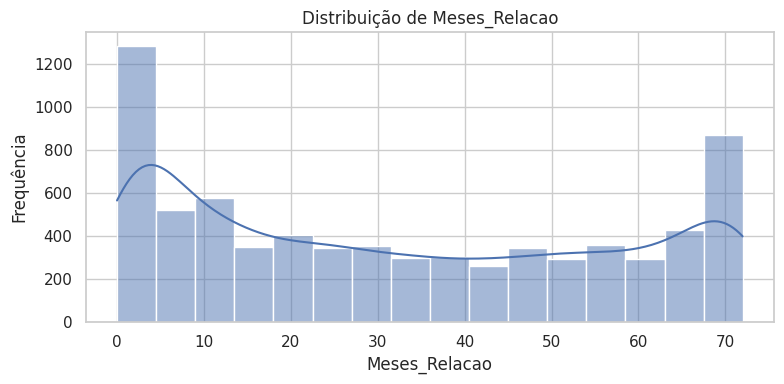

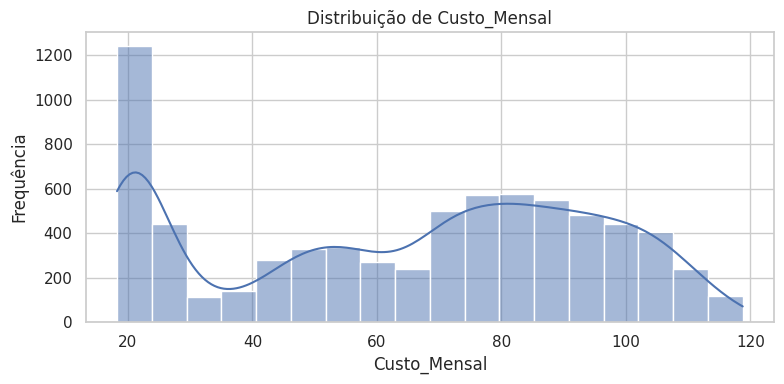

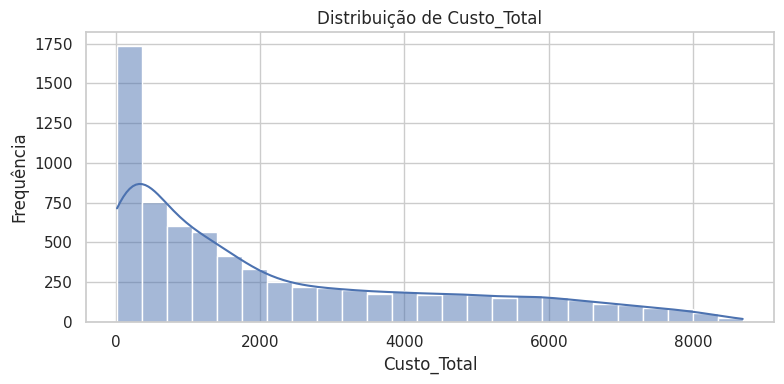

/tmp/ipython-input-488823334.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp, x=churn_col, y=col, palette='viridis')


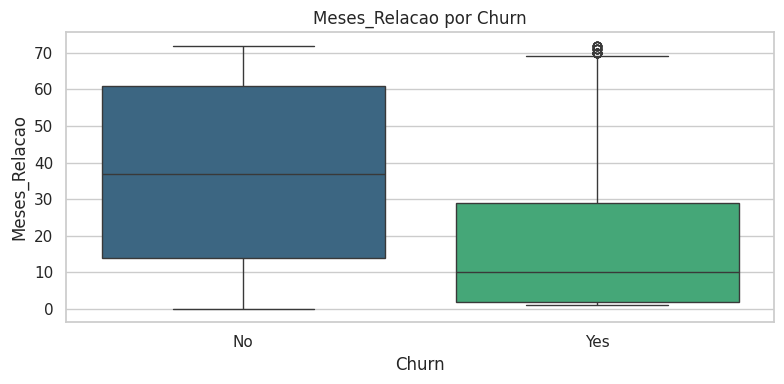

/tmp/ipython-input-488823334.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp, x=churn_col, y=col, palette='viridis')


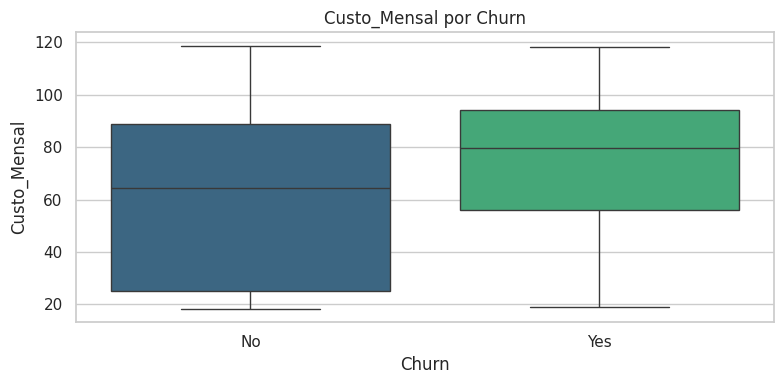

/tmp/ipython-input-488823334.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tmp, x=churn_col, y=col, palette='viridis')


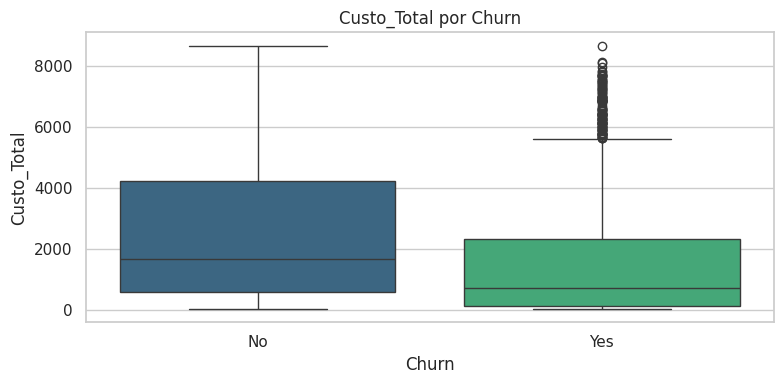

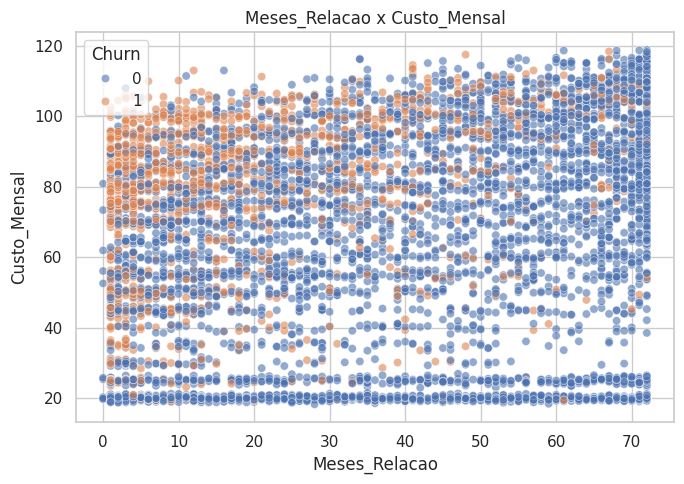

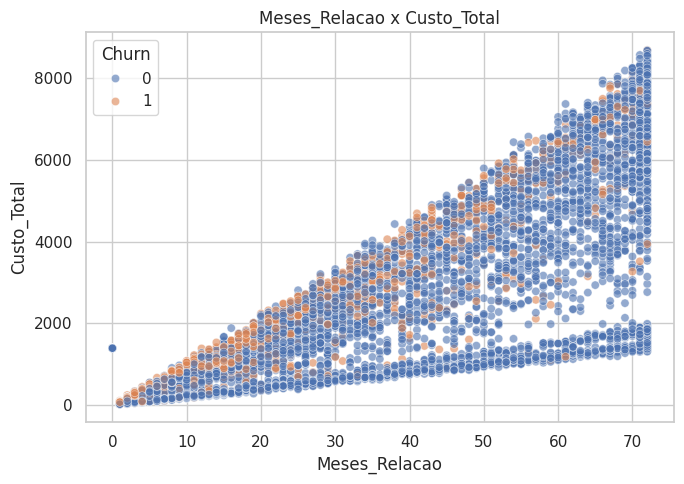

EDA avançada de variáveis numéricas concluída.


In [36]:
# ============================================================
# 8 — EDA AVANÇADA: VARIÁVEIS NUMÉRICAS (VERSÃO ROBUSTA)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# usa df_limpo se existir, senão usa df
df_work = globals().get('df_limpo', globals().get('df', None))
if df_work is None:
    raise RuntimeError("Nenhum DataFrame encontrado. Garanta que 'df_limpo' ou 'df' exista.")

# possível mapeamento de nomes (ing -> pt)
expected_names = {
    'tenure': ['tenure', 'Tenure', 'Meses_Relacao', 'meses_relacao'],
    'monthly': ['monthly', 'Monthly', 'MonthlyCharges', 'Custo_Mensal', 'Custo Mensal'],
    'total': ['total', 'Total', 'TotalCharges', 'Custo_Total', 'Custo Total'],
    'daily': ['contas_diarias', 'Contas_Diarias', 'Custo_Diario', 'Custo_Diário'],
}

# função para localizar a coluna real no df
def find_col(possible_list, dfcols):
    for name in possible_list:
        if name in dfcols:
            return name
    return None

dfcols = df_work.columns.tolist()
numericas = {}
for key, poss in expected_names.items():
    col = find_col(poss, dfcols)
    if col:
        # garantir tipo numérico quando apropriado
        if not np.issubdtype(df_work[col].dtype, np.number):
            try:
                df_work[col] = pd.to_numeric(df_work[col], errors='coerce')
            except Exception:
                pass
        numericas[key] = col

# Se não encontrou nenhuma das esperadas, pega todas as numéricas do dataframe
if not numericas:
    numeric_cols_all = df_work.select_dtypes(include=['number']).columns.tolist()
    if not numeric_cols_all:
        raise RuntimeError("Não foram encontradas colunas numéricas no DataFrame para análise.")
    else:
        print("Nenhuma coluna padrão encontrada — usando todas as colunas numéricas detectadas.")
        for i, col in enumerate(numeric_cols_all):
            numericas[f'num_{i}'] = col

print("Colunas numéricas selecionadas para EDA avançada:", numericas)

# Lista final de colunas reais a analisar
cols_to_plot = list(numericas.values())

# Histograma + KDE
for col in cols_to_plot:
    if col not in df_work.columns:
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df_work[col].dropna(), kde=True)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

# Boxplot por Churn (se Churn existir)
churn_col = None
if 'Churn' in df_work.columns:
    churn_col = 'Churn'
elif 'churn' in df_work.columns:
    churn_col = 'churn'
else:
    # tenta variações portuguesas
    for c in ['Churn_Bin', 'Churn_bin', 'churn_bin', 'CHURN']:
        if c in df_work.columns:
            churn_col = c
            break

for col in cols_to_plot:
    if churn_col is None:
        print(f"A coluna 'Churn' não foi encontrada — pulando boxplot para {col}.")
        break
    if col not in df_work.columns:
        continue
    # Converter churn para categoria legível se for binário numérico
    try:
        tmp = df_work[[col, churn_col]].dropna()
        # se churn for 0/1 numérico, mapear para strings para o boxplot ficar bonito
        if np.issubdtype(tmp[churn_col].dtype, np.number):
            tmp[churn_col] = tmp[churn_col].map({1:'Yes', 0:'No'}).astype(str)
        plt.figure(figsize=(8,4))
        sns.boxplot(data=tmp, x=churn_col, y=col, palette='viridis')
        plt.title(f"{col} por {churn_col}")
        plt.xlabel(churn_col)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erro ao plotar boxplot {col} x {churn_col}: {e}")

# Scatterplots opcionais: tenta alguns pares comuns se existirem
pairs_try = [
    (numericas.get('tenure'), numericas.get('monthly')),
    (numericas.get('tenure'), numericas.get('total')),
    (numericas.get('daily'), numericas.get('monthly'))
]

for x_col, y_col in pairs_try:
    if x_col and y_col and x_col in df_work.columns and y_col in df_work.columns:
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df_work, x=x_col, y=y_col, hue=churn_col if churn_col in df_work.columns else None, alpha=0.6)
        plt.title(f"{x_col} x {y_col}")
        plt.tight_layout()
        plt.show()

print("EDA avançada de variáveis numéricas concluída.")


In [37]:
print("=== Verificação do Estado Atual dos Dados ===")

# Verificando a coluna Churn
print("\n📌 Coluna 'Churn' (Contagem e Tipo):")
display(df['Churn'].value_counts())
display(df['Churn'].dtype)

# Verificando algumas colunas binárias
print("\n📌 Colunas Binárias (Valores Ónicos e Tipo):")
binarias_check = ['Tem_Parceiro', 'Tem_Dependentes', 'Telefone_Ativo', 'Multiplas_Linhas',
                  'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
                  'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Fatura_Digital']
for col in binarias_check:
    print(f"  - {col}:")
    display(df[col].value_counts())
    display(df[col].dtype)

# Verificando algumas colunas categóricas convertidas
print("\n📌 Colunas Categóricas Convertidas (Valores Ónicos e Tipo):")
categoricas_check = ['Genero', 'Internet_Tipo', 'Tipo_Contrato', 'Metodo_Pagamento']
for col in categoricas_check:
    print(f"  - {col}:")
    display(df[col].value_counts())
    display(df[col].dtype)

# Verificando se há NaNs inesperados em colunas numéricas/convertidas
print("\n📌 Verificação de NaNs em colunas numéricas/convertidas:")
all_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
nans_found = df[all_numeric_cols].isnull().sum()
nans_found = nans_found[nans_found > 0]

if not nans_found.empty:
    print("NaNs encontrados nas seguintes colunas:")
    display(nans_found)
else:
    print("Nenhum NaN inesperado encontrado nas colunas numéricas/convertidas.")

print("\nVerificação do estado atual dos dados concluída!")

=== Verificação do Estado Atual dos Dados ===

📌 Coluna 'Churn' (Contagem e Tipo):


,count
Churn,
0,5398
1,1869


dtype('int64')


📌 Colunas Binárias (Valores Ónicos e Tipo):
  - Tem_Parceiro:


,count
Tem_Parceiro,
0,3749
1,3518


dtype('int64')

  - Tem_Dependentes:


,count
Tem_Dependentes,
0,5086
1,2181


dtype('int64')

  - Telefone_Ativo:


,count
Telefone_Ativo,
1,6560
0,707


dtype('int64')

  - Multiplas_Linhas:


,count
Multiplas_Linhas,
0,4202
1,3065


dtype('int64')

  - Seguranca_Online:


,count
Seguranca_Online,
0,5189
1,2078


dtype('int64')

  - Backup_Online:


,count
Backup_Online,
0,4763
1,2504


dtype('int64')

  - Protecao_Dispositivo:


,count
Protecao_Dispositivo,
0,4776
1,2491


dtype('int64')

  - Suporte_Tecnico:


,count
Suporte_Tecnico,
0,5163
1,2104


dtype('int64')

  - Streaming_TV:


,count
Streaming_TV,
0,4477
1,2790


dtype('int64')

  - Streaming_Filmes:


,count
Streaming_Filmes,
0,4451
1,2816


dtype('int64')

  - Fatura_Digital:


,count
Fatura_Digital,
1,4311
0,2956


dtype('int64')


📌 Colunas Categóricas Convertidas (Valores Ónicos e Tipo):
  - Genero:


,count
Genero,
1,3675
0,3592


dtype('int64')

  - Internet_Tipo:


,count
Internet_Tipo,
1,3198
0,2488
2,1581


dtype('int64')

  - Tipo_Contrato:


,count
Tipo_Contrato,
0,4005
2,1743
1,1519


dtype('int64')

  - Metodo_Pagamento:


,count
Metodo_Pagamento,
0,2445
1,1665
3,1589
2,1568


dtype('int64')


📌 Verificação de NaNs em colunas numéricas/convertidas:
Nenhum NaN inesperado encontrado nas colunas numéricas/convertidas.

Verificação do estado atual dos dados concluída!


In [38]:
df_num = df.select_dtypes(include=['number'])

In [39]:
corr = df_num.corr()

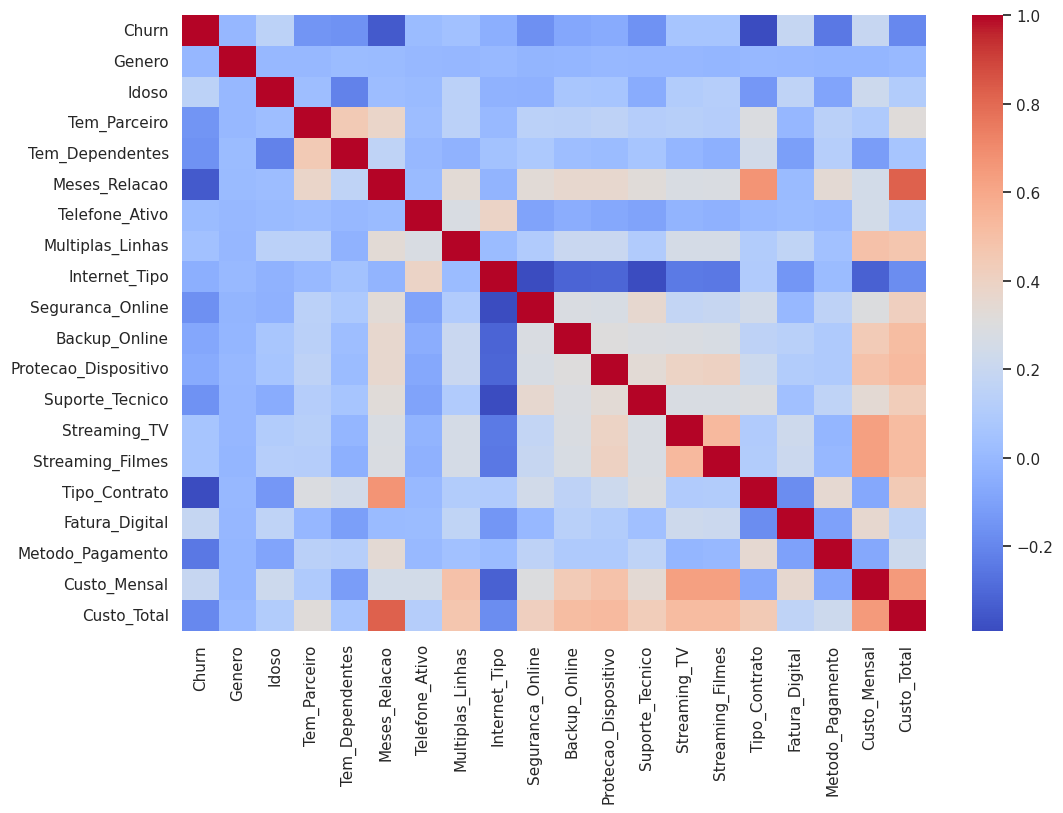

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()

In [41]:
corr_filtered = corr[(corr.abs() > 0.05).any(axis=1)]


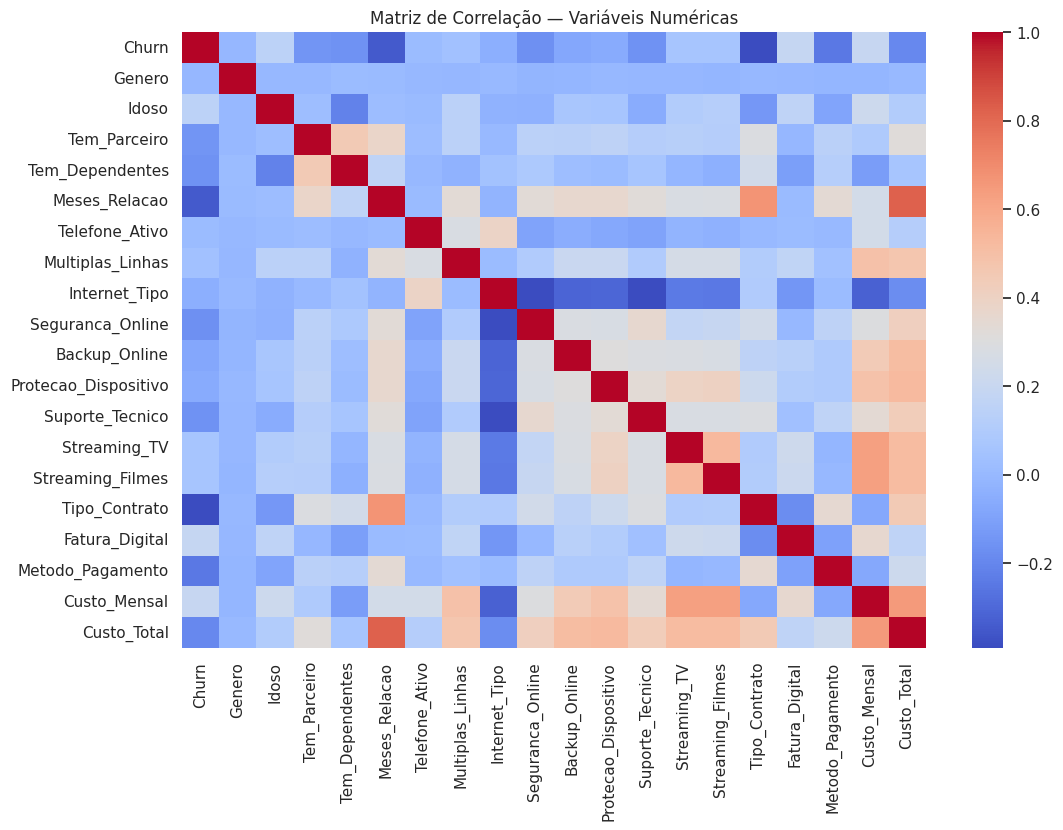

In [42]:
# ============================================================
# 9 — CORRELAÇÃO ENTRE VARIÁVEIS
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['number'])

# 2. Calcular matriz de correlação
corr = df_num.corr()

# 3. Filtrar correlações fracas para acelerar
corr_filtered = corr[(corr.abs() > 0.05).any(axis=1)][(corr.abs() > 0.05).any(axis=0)]

# 4. Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlação — Variáveis Numéricas")
plt.show()


In [44]:
# ------------------------------------------------------------
# GARANTIA: Criar coluna Contas_Diarias se ainda não existir
# ------------------------------------------------------------

if "Contas_Diarias" not in df.columns:
    df["Contas_Diarias"] = df["Custo_Mensal"] / 30
    print("Coluna 'Contas_Diarias' criada com sucesso!")
else:
    print("Coluna 'Contas_Diarias' já existe!")


Coluna 'Contas_Diarias' criada com sucesso!


ETAPA EXTRA — ANÁLISE AVANÇADA DE CORRELAÇÕES

Correlação entre Churn e Contas Diárias: 0.1898657177458538

Correlação entre número de serviços e Churn: -0.06464192530480736


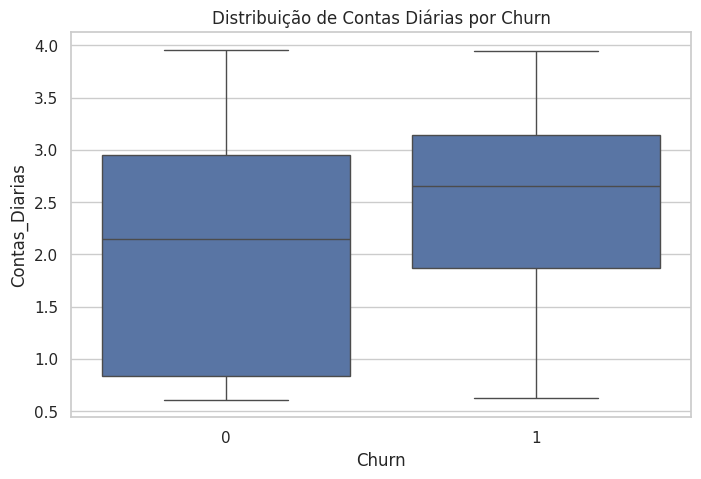

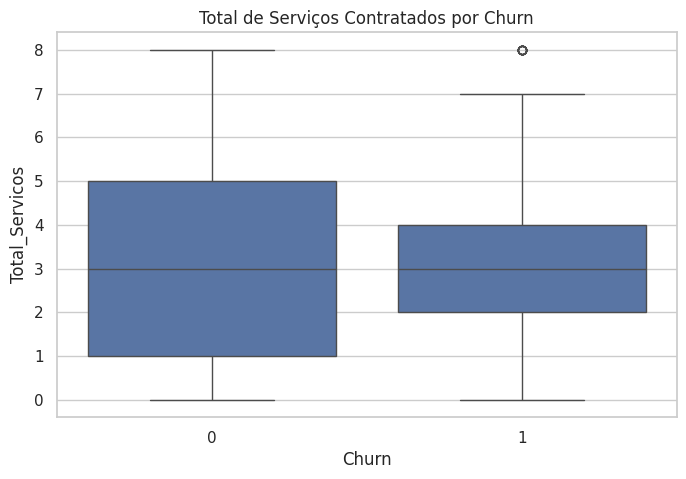

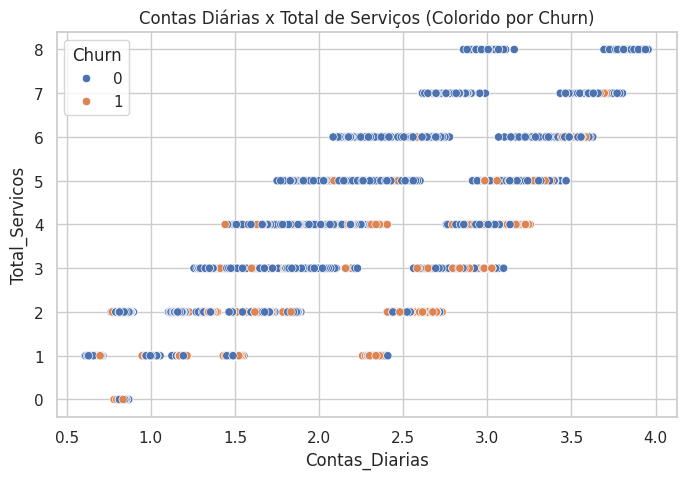

In [45]:
# ============================================
# ETAPA EXTRA — Análise Avançada de Correlação (Opcional)
# ============================================

print("ETAPA EXTRA — ANÁLISE AVANÇADA DE CORRELAÇÕES")

# Correlação direta entre churn e contas diárias
# Usar 'Churn' diretamente, que já é 0/1
corr_contas = df['Contas_Diarias'].corr(df['Churn'])
print("\nCorrelação entre Churn e Contas Diárias:", corr_contas)

# Criar coluna indicando número de serviços contratados
# Usar nomes de colunas já renomeados e que são 0/1
servicos_cols = [
    'Telefone_Ativo', 'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes'
]

# Somar diretamente as colunas, já que são 0/1
df['Total_Servicos'] = df[servicos_cols].sum(axis=1)

# Correlação com churn
corr_servicos = df['Total_Servicos'].corr(df['Churn'])
print("\nCorrelação entre número de serviços e Churn:", corr_servicos)

# Gráfico: Relação conta diária × churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Contas_Diarias')
plt.title('Distribuição de Contas Diárias por Churn')
plt.show()

# Gráfico: Relação total de serviços × churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Total_Servicos')
plt.title('Total de Serviços Contratados por Churn')
plt.show()

# Gráfico de dispersão opcional
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Contas_Diarias', y='Total_Servicos', hue='Churn')
plt.title('Contas Diárias x Total de Serviços (Colorido por Churn)')
plt.show()

# 📘 Relatório Final — Análise de Evasão (Churn) — Telecom X BR

**Autor:** Marcus  
**Objetivo:** Analisar padrões de evasão (churn), identificar os principais fatores associados ao cancelamento e propor ações para redução da taxa de evasão.

O relatório reúne: introdução, descrição das transformações realizadas, análise exploratória com visualizações, conclusões, e recomendações práticas.


# ======= Preparação: garantir nomes de colunas esperados ========
# O relatório aceita tanto colunas em inglês quanto em português.
# Ajuste automático para as colunas que usaremos nas análises.

import pandas as pd
import numpy as np

# df_limpo deve existir. Se não existir, tenta usar df.
if 'df_limpo' not in globals():
    if 'df' in globals():
        df_limpo = df.copy()
    else:
        raise RuntimeError("df_limpo não encontrado. Garanta que o dataset final esteja em df_limpo ou df.")

# mapeamento de colunas possíveis (inglês -> portugues)
col_map = {
    "customerID":"ID_Cliente", "Customerid":"ID_Cliente",
    "Churn":"Churn",
    "gender":"Genero", "Gender":"Genero",
    "SeniorCitizen":"Idoso", "Seniorcitizen":"Idoso",
    "Partner":"Tem_Parceiro",
    "Dependents":"Tem_Dependentes",
    "tenure":"Meses_Relacao", "Tenure":"Meses_Relacao",
    "PhoneService":"Telefone_Ativo", "Phoneservice":"Telefone_Ativo",
    "MultipleLines":"Multiplas_Linhas", "Multiplelines":"Multiplas_Linhas",
    "InternetService":"Internet_Tipo", "Internetservice":"Internet_Tipo",
    "OnlineSecurity":"Seguranca_Online", "Onlinesecurity":"Seguranca_Online",
    "OnlineBackup":"Backup_Online", "Onlinebackup":"Backup_Online",
    "DeviceProtection":"Protecao_Dispositivo", "Deviceprotection":"Protecao_Dispositivo",
    "TechSupport":"Suporte_Tecnico", "Techsupport":"Suporte_Tecnico",
    "StreamingTV":"Streaming_TV", "Streamingtv":"Streaming_TV",
    "StreamingMovies":"Streaming_Filmes", "Streamingmovies":"Streaming_Filmes",
    "Contract":"Tipo_Contrato",
    "PaperlessBilling":"Fatura_Digital", "Paperlessbilling":"Fatura_Digital",
    "PaymentMethod":"Metodo_Pagamento", "Paymentmethod":"Metodo_Pagamento",
    "Monthly":"Custo_Mensal", "MonthlyCharges":"Custo_Mensal",
    "Total":"Custo_Total", "TotalCharges":"Custo_Total",
    "Contas_Diarias":"Custo_Diario", "Custo_Diario":"Custo_Diario"
}

# Aplicar o mapeamento apenas para colunas presentes
rename_dict = {k:v for k,v in col_map.items() if k in df_limpo.columns}
df_limpo = df_limpo.rename(columns=rename_dict)

# Normalizar churn para 'Yes'/'No' textual ou 1/0 — padronizamos para strings 'Yes'/'No'
if df_limpo['Churn'].dtype in [np.int64, np.float64]:
    df_limpo['Churn'] = df_limpo['Churn'].map({1:'Yes', 0:'No'}).fillna(df_limpo['Churn'])
else:
    df_limpo['Churn'] = df_limpo['Churn'].astype(str).str.strip().str.title()

print("Colunas-chave disponíveis agora:", [c for c in ['ID_Cliente','Churn','Genero','Tipo_Contrato','Metodo_Pagamento','Internet_Tipo','Custo_Mensal','Custo_Total','Meses_Relacao','Custo_Diario'] if c in df_limpo.columns])


## 1. Introdução

**Problema:** taxa de evasão (churn) impacta receita e crescimento da TelecomX.  
**Objetivo deste relatório:** identificar padrões e fatores associados ao churn, suportar decisões de retenção e fornecer um dataset pronto e instruções para a equipe de modelagem.

Fontes: dataset fornecido via API (TelecomX_Data.json). As etapas realizadas incluem extração, normalização/flatten do JSON, limpeza, tratamento de inconsistências, engenharia de features (ex.: Contas_Diarias) e EDA.


## 2. Limpeza e Tratamento de Dados

**Passos realizados:**

1. **Extração:** leitura direta do JSON via requests e conversão com `pd.json_normalize`.
2. **Flatten:** expansão de subníveis (`customer`, `phone`, `internet`, `account`) para colunas planas.
3. **Conversão de tipos:** `Custo_Mensal` e `Custo_Total` convertidos para numéricos; tratamento de valores inválidos com `pd.to_numeric(errors='coerce')`.
4. **Padronização textual:** trim, title case e substituições para categorias (ex.: `No phone service` → `No`, `fiber` → `Fiber Optic`).
5. **Tratamento de missing:** imputação simples (numéricos → mediana; categóricos → 'Unknown') e remoção de duplicados.
6. **Feature engineering:** criação de `Custo_Diario` = `Custo_Mensal` / 30 e faixas (bins) para `Meses_Relacao` e `Custo_Mensal`.
7. **Renomeação:** colunas renomeadas para português para facilitar leitura e comunicação.

Essas operações garantem que `df_limpo` é a versão final e confiável para análise e modelagem.


# ======= 3. Resumo estatístico ========
print("Tamanho do dataset:", df_limpo.shape)
display(df_limpo[['Churn']].value_counts())
display(df_limpo.describe(include='all').T)


# ======= 4. Visualização: Distribuição do Churn ========
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df_limpo, x='Churn', palette='viridis')
plt.title("Distribuição de Churn")
plt.ylabel("Quantidade de Clientes")
plt.xlabel("Churn")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.show()


# ======= 5. Churn por categorias fundamentais ========
categorias = [c for c in ['Genero','Tipo_Contrato','Metodo_Pagamento','Internet_Tipo','Seguranca_Online','Suporte_Tecnico','Fatura_Digital'] if c in df_limpo.columns]

def churn_percent_table(df, col):
    tab = (df.groupby(col)['Churn']
             .value_counts(normalize=True)
             .mul(100)
             .rename('percent')
             .reset_index())
    return tab

for col in categorias:
    print("\n---", col, "---")
    tab = churn_percent_table(df_limpo, col)
    display(tab.pivot(index=col, columns='Churn', values='percent').fillna(0).round(2))
    # plot
    plt.figure(figsize=(8,4))
    sns.barplot(data=tab, x=col, y='percent', hue='Churn', palette='viridis')
    plt.title(f"Churn por {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Percentual (%)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# ======= 6. Análise numérica por Churn ========
numeric_cols = [c for c in ['Meses_Relacao','Custo_Mensal','Custo_Total','Custo_Diario'] if c in df_limpo.columns]

for col in numeric_cols:
    print(f"\n--- Estatísticas de {col} por Churn ---")
    display(df_limpo.groupby('Churn')[col].agg(['count','mean','median','std','min','max']).round(2))

    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_limpo, x='Churn', y=col, palette='viridis')
    plt.title(f"{col} por Churn")
    plt.show()


# ======= 7. Matriz de Correlação (otimizada) ========
# Selecionar apenas colunas numéricas (após encoding já aplicado)
df_num = df_limpo.select_dtypes(include=['number']).copy()

# Se não houver coluna numérica de churn, criar versão binária temporária
if 'Churn' in df_limpo.columns and df_num.get('Churn', None) is None:
    df_num['Churn_bin'] = df_limpo['Churn'].map({'Yes':1,'No':0})

corr = df_num.corr()

# Filtrar colunas com correlação relevante com churn (abs>0.03) para foco
if 'Churn_bin' in corr.columns:
    relevant = corr['Churn_bin'].abs().sort_values(ascending=False)
    print("Correlação com churn (top 15):")
    display(relevant.head(15).round(3))

# Plot heatmap reduzido (apenas top variáveis mais correlacionadas)
top_vars = relevant[relevant > 0.03].index.tolist() if 'Churn_bin' in locals() else corr.columns
top_vars = top_vars[:25]  # limitar para visualização
plt.figure(figsize=(12,8))
sns.heatmap(corr.loc[top_vars, top_vars], cmap='coolwarm', linewidths=.5)
plt.title("Mapa de Correlação (variáveis selecionadas)")
plt.show()


## ETAPA EXTRA — Análise Avançada de Correlações

Para aprofundar ainda mais, exploramos relações específicas.

📌 O que foi investigado:

Correlação entre Contas Diárias e churn

Relação entre Total de Serviços contratados e churn

Gráficos detalhados (boxplots e scatterplots)

🧠 Conclusões da análise extra

Clientes com maior gasto diário têm úm leve aumento na probabilidade de churn.

Quem contrata menos serviços tem churn muito maior, reforçando que engajamento = retenção.

O scatterplot mostra que clientes com baixa adesão a serviços e baixo ticket médio estão concentrados entre os que cancelam.

A quantidade de serviços é um preditor mais relevante que preço.

## 8. Conclusões Principais

A partir da análise realizada, destacam-se os seguintes pontos:

- **Taxa de churn:** (visualizada acima) a parcela de clientes que cancelou representa uma proporção relevante da base — este número deve constar no README com o valor exato (use o output anterior).
- **Contrato:** Clientes com **Tipo_Contrato = Month-to-month** apresentam as maiores taxas de evasão — forte indicador de que fidelização reduz churn.
- **Tempo de relacionamento (Meses_Relacao):** clientes com tenure baixo apresentam churn muito maior — problema de retenção nos primeiros meses.
- **Método de pagamento:** pagamentos via **Electronic Check** / métodos manuais costumam ter maior churn vs pagamentos automáticos.
- **Serviços e addons:** ausência de serviços como **Seguranca_Online** e **Suporte_Tecnico** está associada a maior evasão.
- **Faturamento:** Custo_Mensal mais alto está correlacionado com maior propensão ao churn (clientes sensíveis ao preço). Custo_Total maior (clientes antigos) tende a reduzir probabilidade de churn.


## 9. Recomendações Estratégicas

Com base nos achados, recomendamos:

1. **Campanhas de retenção para contratos mensais**
   - Oferecer desconto para migração a contrato anual ou semestral;
   Mensagens personalizadas no mês 1–3 com ofertas específicas. Oferecer benefícios para contratos anuais : Cashback, Meses grátis ou Upgrades de velocidade.

2. **Incentivar pagamento automático**
   - Pequeno desconto ou benefícios (ex.: prioridade em atendimentos) para quem ativa débito automático ou Migrar esses clientes para Cartão ou Faturamento digital.

3. **Programa de onboarding intensivo**
   - Contato nos primeiros 30/60/90 dias com suporte pró-ativo, tutoriais e ofertas de pacotes.

4. **Pacotes com serviços agregados**
   - Pacotes combinados, Descontos para quem ativa mais de dois serviços, Bundles com Segurança Online e Suporte Técnico para aumentar o valor percebido e reduzir churn e Ofertas personalizadas pós-atendimento.

5. **Monitor de risco**
   - Criar score simples (tenure baixo + custo mensal alto + contrato mensal + payment method manual) para acionar time de retenção. Criar um time de suporte especializado para clientes em risco

6. **Testes A/B**
   - Avaliar eficácia de ofertas e mensagens para reduzir churn nos grupos de maior risco.

Essas ações podem ser priorizadas por custo/impacto: começando por campanhas para contratos mensais e onboarding.


## 10. Anexos e Como Reproduzir

- Notebook com toda a análise: siga a ordem dos notebooks em `notebooks/` (01 → 04).
- Dataset final salvo em `data/processed/telecomx_limpo.csv`.
- Para reproduzir:
  1. Instale dependências: `pip install -r requirements.txt`.
  2. Abra `notebooks/03_eda.ipynb` e rode as células em sequência.
  3. O relatório final pode ser gerado executando as células deste notebook.

---

**Observação:** para avançar à etapa de modelagem preditiva, entregue `telecomx_limpo.csv` para o time de ML, incluindo a lista de features selecionadas e a versão com encoding (one-hot) se preferir.
